In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_path = "C:\\Users\\Tejas Javare\\Desktop\\Tejas_Oasis\\Project 2\\ifood_df.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds      

In [5]:
df.fillna(df.mean(), inplace=True)

# Verify that missing values are handled
print("\nAfter handling missing values:")
print(df.isnull().sum())


After handling missing values:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntReg

In [6]:
# Descriptive Statistics
descriptive_stats = df.describe()

In [7]:
# Feature selection for clustering
selected_features = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']]


In [8]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

In [9]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

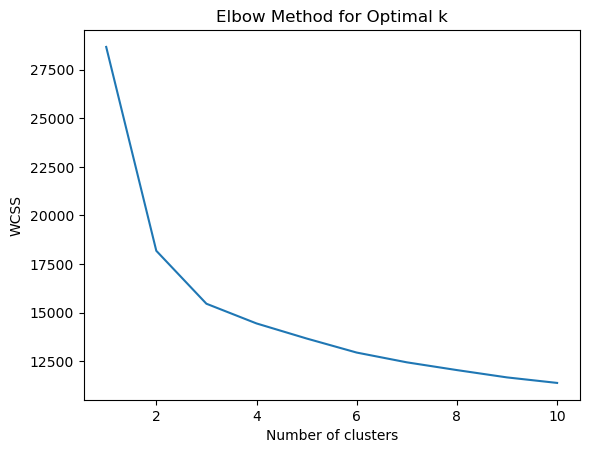

In [10]:
# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [11]:
# Based on the Elbow Method, choose the optimal number of clusters (k)
optimal_k = 3

In [12]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

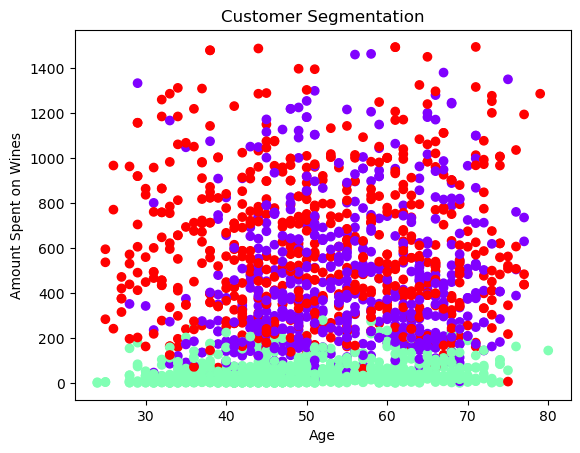

In [13]:
# Visualize the clusters
plt.scatter(df['Age'], df['MntWines'], c=df['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Amount Spent on Wines')
plt.show()

In [14]:
# Calculate silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2845850054888942


In [15]:
# Display insights and recommendations based on cluster analysis
cluster_insights = df.groupby('Cluster').mean()
print(cluster_insights)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        56863.811448  0.299663  0.868687  48.143098  457.831650  19.683502   
1        34161.198603  0.769461  0.452096  49.271457   39.035928   4.727545   
2        75238.249589  0.042693  0.243021  49.422003  597.745484  68.620690   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             128.151515        25.720539         19.405724     58.018519   
1              21.513972         7.035928          4.973054     14.838323   
2             438.151067       100.041051         71.113300     78.513957   

         ...  marital_Together  marital_Widow  education_2n Cycle  \
Cluster  ...                                                        
0        ...          0.260943       0.040404            0.058923   
1        ..

In [16]:

# Analyze characteristics of each segment
segment_characteristics = df.groupby('Cluster').mean()

In [17]:
# Display insights and recommendations based on the analysis
for cluster_id, characteristics in segment_characteristics.iterrows():
    print(f"\nInsights for Cluster {cluster_id}:")
    print(f"Average Income: ${characteristics['Income']:.2f}")
    print(f"Average Age: {int(characteristics['Age'])} years")
    print(f"Average Amount Spent on Wines: ${characteristics['MntWines']:.2f}")
    # Add additional insights based on your specific features of interest


Insights for Cluster 0:
Average Income: $56863.81
Average Age: 54 years
Average Amount Spent on Wines: $457.83

Insights for Cluster 1:
Average Income: $34161.20
Average Age: 48 years
Average Amount Spent on Wines: $39.04

Insights for Cluster 2:
Average Income: $75238.25
Average Age: 51 years
Average Amount Spent on Wines: $597.75


In [19]:
    # Recommendations based on insights
    if cluster_id == 0:
        print("Recommendations for Cluster 0:")
        print("- Target marketing promotions for premium products.")
        print("- Focus on personalized customer experiences.")
    elif cluster_id == 1:
        print("Recommendations for Cluster 1:")
        print("- Offer discounts or promotions to increase frequency of purchases.")
        print("- Improve online and catalog shopping experience.")
    elif cluster_id == 2:
        print("Recommendations for Cluster 2:")
        print("- Target younger age groups with special promotions.")
        print("- Enhance digital marketing strategies.")

Recommendations for Cluster 2:
- Target younger age groups with special promotions.
- Enhance digital marketing strategies.
